In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cProfile
from pathlib import Path

In [80]:
file_path = 'WalmartSQL repository.csv'
columns_to_keep = ['product_line', 'unit_price', 'gross_income'] # enter the names of the columns you want to keep
column_to_sort = 'gross_income' # Change name to column you want  to sort by
chunksize=100000

In [81]:
def read_csv():
    global file_path
    
    file_path = Path(file_path)
    if file_path.is_file():
        chunk_generator = pd.read_csv(file_path, sep=';', chunksize=chunksize)
        for chunk in chunk_generator:
            yield chunk
    else:
        print("Error: File not found. Please check the file path.")


In [82]:
def filter_data_by_columns(columns_to_keep):
    generator = read_csv()
    for chunk in generator:
        filtered_chunk = chunk[columns_to_keep]
        yield filtered_chunk

In [83]:
def sort_data_by_column():
    global column_to_sort
    generator = read_csv()
    sorted_data = pd.DataFrame()
    for chunk in generator:
        sorted_chunk = chunk.sort_values(by=column_to_sort)
        sorted_data = pd.concat([sorted_data, sorted_chunk], ignore_index=True)
    return sorted_data

In [84]:
def calculate_average_sorted_column():
    global column_to_sort
    if column_to_sort:
        generator = read_csv()
        sorted_data = pd.DataFrame()
        for chunk in generator:
            sorted_chunk = chunk.sort_values(by=column_to_sort)
            sorted_data = pd.concat([sorted_data, sorted_chunk], ignore_index=True)
        
        # Check if the sorted column contains numeric values
        if pd.api.types.is_numeric_dtype(sorted_data[column_to_sort]):
            average_value = sorted_data[column_to_sort].mean()
            return average_value
        else:
            print("Sorted column is not numeric. Cannot calculate average.")
            return None
    else:
        print("No column provided for sorting. Cannot calculate average.")
        return None

In [85]:
def print_entire_file(file_path):
    # Read the entire file into a DataFrame and print it
    df = pd.read_csv(file_path, sep=';')
    print("Entire file:")
    print(df)

In [86]:
#print_entire_file(file_path)

In [87]:
# Filter and print
print("\nFiltered data:")
filtered_data_generator = filter_data_by_columns(columns_to_keep)
for chunk in filtered_data_generator:
    print(chunk.head())

# Sort and print
print("\nSorted data:")
sorted_data = sort_data_by_column()
print(sorted_data.head())


# Calculate average value of the sorted column
average_value = calculate_average_sorted_column()
if average_value is not None:
    print('Average value of {}:'.format(column_to_sort), average_value,)


Filtered data:
             product_line  unit_price  gross_income
0       Health and beauty       74.69       26.1415
1  Electronic accessories       15.28        3.8200
2      Home and lifestyle       46.33       16.2155
3       Health and beauty       58.22       23.2880
4       Sports and travel       86.31       30.2085

Sorted data:
    invoice_id branch       city customer_type  gender         product_line  \
0  784-21-9238      C  Naypyitaw        Member    Male    Sports and travel   
1  308-39-1707      A     Yangon        Normal  Female  Fashion accessories   
2  279-62-1445      C  Naypyitaw        Member  Female  Fashion accessories   
3  192-98-7397      C  Naypyitaw        Normal    Male  Fashion accessories   
4  236-86-3015      C  Naypyitaw        Member    Male   Home and lifestyle   

   unit_price  quantity     vat    total                 dtme       tme  \
0       10.17         1  0.5085  10.6785  2019-02-07 00:00:00  14:15:00   
1       12.09         1  0.6045  

In [88]:
def profile_read_csv():
    cProfile.run('list(read_csv())')

profile_read_csv()

         2814 function calls (2772 primitive calls) in 0.011 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.011    0.005 3451933597.py:1(read_csv)
        1    0.000    0.000    0.000    0.000 <string>:1(<lambda>)
        1    0.000    0.000    0.011    0.011 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 <string>:2(__init__)
        2    0.000    0.000    0.000    0.000 __init__.py:34(using_copy_on_write)
       15    0.000    0.000    0.000    0.000 __init__.py:55(using_pyarrow_string_dtype)
        7    0.000    0.000    0.000    0.000 _asarray.py:108(<setcomp>)
        7    0.000    0.000    0.000    0.000 _asarray.py:27(require)
        1    0.000    0.000    0.000    0.000 _collections_abc.py:276(__iter__)
        7    0.000    0.000    0.000    0.000 _dtype.py:24(_kind_name)
        7    0.000    0.000    0.000    0.000 _dtype.py:330(_name_includes_bit_suffix)
   

In [89]:
def profile_filter_data_by_columns( columns_to_keep):
    cProfile.run('list(filter_data_by_columns( columns_to_keep))')

profile_filter_data_by_columns( columns_to_keep)

         3447 function calls (3390 primitive calls) in 0.010 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.010    0.005 2238723700.py:1(filter_data_by_columns)
        2    0.000    0.000    0.009    0.004 3451933597.py:1(read_csv)
        1    0.000    0.000    0.000    0.000 <string>:1(<lambda>)
        1    0.000    0.000    0.010    0.010 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 <string>:2(__init__)
        5    0.000    0.000    0.000    0.000 __init__.py:34(using_copy_on_write)
       17    0.000    0.000    0.000    0.000 __init__.py:55(using_pyarrow_string_dtype)
        7    0.000    0.000    0.000    0.000 _asarray.py:108(<setcomp>)
        7    0.000    0.000    0.000    0.000 _asarray.py:27(require)
        1    0.000    0.000    0.000    0.000 _collections_abc.py:276(__iter__)
       10    0.000    0.000    0.000    0.000 _dtype.py:24(_kind_name)
    

In [90]:
def profile_sort_data_by_column():
    cProfile.run('sort_data_by_column()')

profile_sort_data_by_column()

         3765 function calls (3692 primitive calls) in 0.011 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.011    0.011 2080189308.py:1(sort_data_by_column)
        2    0.000    0.000    0.009    0.004 3451933597.py:1(read_csv)
        1    0.000    0.000    0.000    0.000 <string>:1(<lambda>)
        1    0.000    0.000    0.011    0.011 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 <string>:2(__init__)
        8    0.000    0.000    0.000    0.000 __init__.py:34(using_copy_on_write)
        1    0.000    0.000    0.000    0.000 __init__.py:42(warn_copy_on_write)
       15    0.000    0.000    0.000    0.000 __init__.py:55(using_pyarrow_string_dtype)
        7    0.000    0.000    0.000    0.000 _asarray.py:108(<setcomp>)
        7    0.000    0.000    0.000    0.000 _asarray.py:27(require)
        1    0.000    0.000    0.000    0.000 _collections_abc.py:276(__iter_

In [91]:
def profile_calculate_average_sorted_column():
    cProfile.run('calculate_average_sorted_column()')

profile_calculate_average_sorted_column()

         3893 function calls (3820 primitive calls) in 0.010 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.009    0.009 2445429563.py:1(calculate_average_sorted_column)
        2    0.000    0.000    0.007    0.004 3451933597.py:1(read_csv)
        1    0.000    0.000    0.000    0.000 <string>:1(<lambda>)
        1    0.000    0.000    0.009    0.009 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 <string>:2(__init__)
       11    0.000    0.000    0.000    0.000 __init__.py:34(using_copy_on_write)
        3    0.000    0.000    0.000    0.000 __init__.py:42(warn_copy_on_write)
       15    0.000    0.000    0.000    0.000 __init__.py:55(using_pyarrow_string_dtype)
        7    0.000    0.000    0.000    0.000 _asarray.py:108(<setcomp>)
        7    0.000    0.000    0.000    0.000 _asarray.py:27(require)
        1    0.000    0.000    0.000    0.000 _collections_abc.py

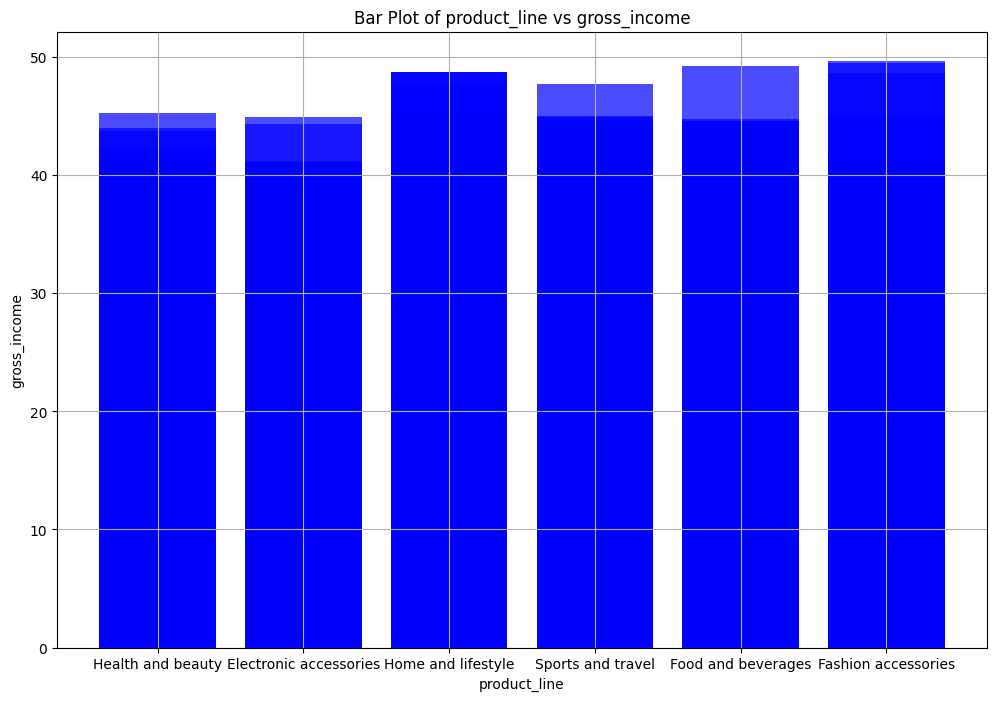

In [93]:
# Select two columns for plotting
x_column = 'product_line'  # Update with your column name
y_column = 'gross_income'  # Update with your column name

# Read the CSV file
data_generator = read_csv()
# Extract the data from the selected columns
x_data = np.array([])
y_data = np.array([])
for chunk in data_generator:
    x_data = np.concatenate((x_data, chunk[x_column].values))
    y_data = np.concatenate((y_data, chunk[y_column].values))

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(x_data, y_data, color='blue', alpha=0.7)
plt.title('Bar Plot of {} vs {}'.format(x_column, y_column))
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()